In [15]:
import pandas as pd
cleaned_data = pd.read_excel('clean_data_relevant.xlsx')

In [16]:
cleaned_data

,Unnamed: 0,BROKER,LATITUDE,LONGITUDE,TYPE,BOROUGH,NEIGHBOURHOOD,BEDS,POSTCODE,BATH,PROPERTYSQFT,PRICE
0,0,277,0.633396,0.505918,2,1,264,0.166667,18,0.2,0.134948,315000
1,1,844,0.102276,0.103390,6,3,259,0.333333,54,0.2,0.205882,260000
2,2,217,0.633742,0.505683,2,1,264,0.250000,18,0.1,0.024798,69000
3,3,844,0.423098,0.534539,6,0,192,0.416667,127,0.2,0.435294,690000
4,4,277,0.750035,0.556240,2,1,264,0.166667,23,0.2,0.225399,899500
...,...,...,...,...,...,...,...,...,...,...,...,...
4501,4501,217,0.665089,0.539708,0,1,263,0.083333,40,0.1,0.225399,599000
4502,4502,591,0.563894,0.713574,0,2,196,0.083333,147,0.1,0.225399,245000
4503,4503,277,0.596189,0.453402,0,1,264,0.083333,9,0.1,0.225399,1275000
4504,4504,288,0.588660,0.690689,2,2,91,0.166667,146,0.1,0.049020,598125


In [17]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = LinearRegression().fit(X_train, y_train)

print('Coef: ',reg.coef_)
print('intercept_', reg.intercept_)

Coef:  [-2.62662002e+01  4.24832500e+01  1.06273516e+06  4.69906579e+05
 -6.05030269e+04 -3.92187261e+05  2.54220037e+03 -2.47245377e+06
 -1.27279034e+04  9.00825889e+06  8.25126303e+06]
intercept_ -556946.2474463198


In [20]:
y_pred = reg.predict(X_test)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
import numpy as np

print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.3507572464771538
Mean Absolute Error: 1338345.034873028
Median Absolute Error: 779480.9058892394
Mean Squared Error: 6800512913069.284
Root Mean Squared Error: 2607779.306818214


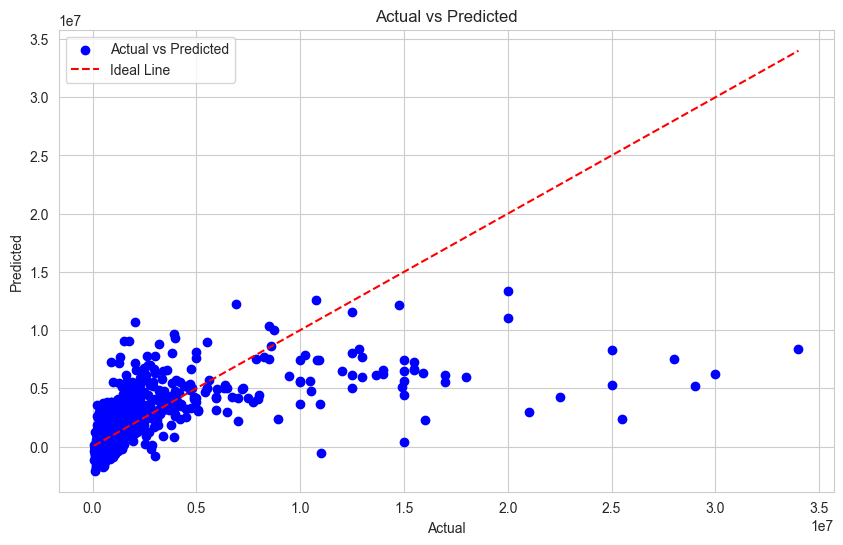

In [22]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
cv = RepeatedKFold(n_splits=5, n_repeats=5,random_state=1)
pipe_linear = Pipeline([
    ('linear', LinearRegression(fit_intercept=True))
])

model_linear_scores = cross_val_score(pipe_linear, X, y, scoring='neg_mean_absolute_error', cv = cv)
model_linear_scores

array([-1276023.23550454, -1326329.62138614, -1230205.69012434,
       -1231145.17383767, -1373480.5709609 , -1232611.42802719,
       -1278424.30065611, -1345145.75090578, -1303135.89981292,
       -1248006.150696  , -1333781.47415554, -1274435.5437935 ,
       -1202980.944482  , -1164481.21582138, -1424688.95297948,
       -1369707.00932168, -1216905.7292658 , -1375743.96009084,
       -1242251.34533497, -1228650.4493203 , -1294350.44869657,
       -1343848.89147619, -1267161.2708859 , -1356817.02311707,
       -1154223.40106715])

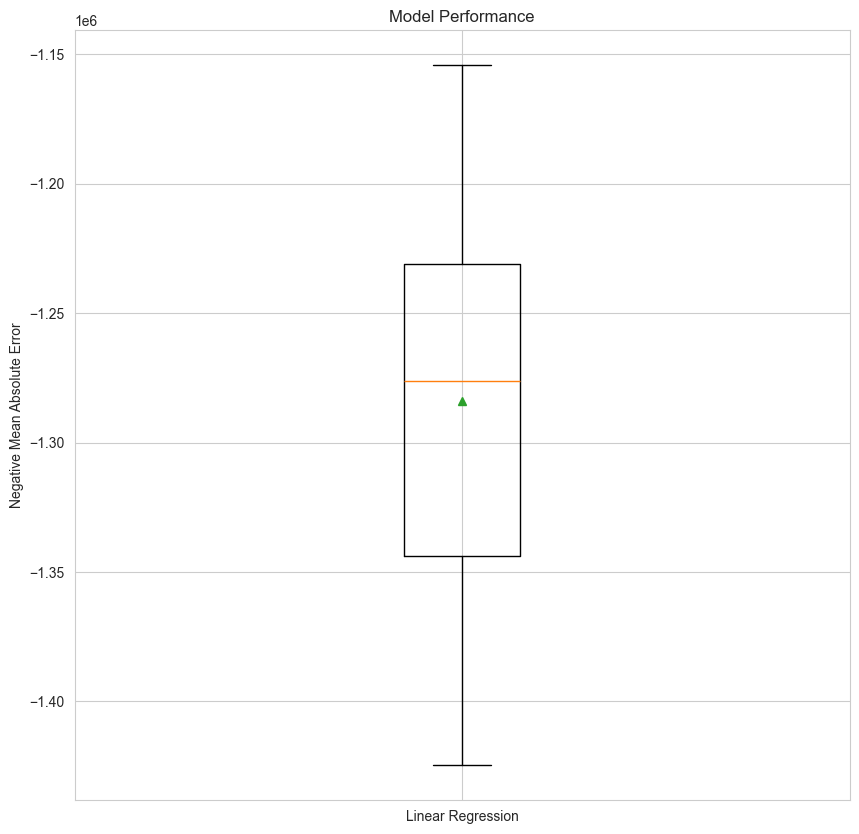

In [35]:
plt.figure(figsize=(10, 10))
plt.boxplot([model_linear_scores], labels=['Linear Regression'], showmeans=True)
plt.title('Model Performance')
plt.ylabel('Negative Mean Absolute Error')
plt.show()

In [23]:
huber = HuberRegressor().fit(X_train, y_train)
y_pred = huber.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.021904624217182644
Mean Absolute Error: 1151054.1453237287
Median Absolute Error: 354408.0847179651
Mean Squared Error: 10245089678910.588
Root Mean Squared Error: 3200795.1635352406


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.35150684287902845
Mean Absolute Error: 1331930.7927206515
Median Absolute Error: 773423.2893763159
Mean Squared Error: 6792661242822.864
Root Mean Squared Error: 2606273.439764689


In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.35075727668415835
Mean Absolute Error: 1338344.6349367655
Median Absolute Error: 779479.0225051644
Mean Squared Error: 6800512596665.098
Root Mean Squared Error: 2607779.246152768


In [29]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(3,10):
    print(i)
    neig2 = KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train)
    y_pred = neig2.predict(X_test)
    print("R-squared:", r2_score(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

3
R-squared: -0.3911723393830133
Mean Absolute Error: 1782917.9689349113
Median Absolute Error: 635000.0
Mean Squared Error: 14571876862613.414
Root Mean Squared Error: 3817312.780296293
4
R-squared: -0.2550260294838955
Mean Absolute Error: 1724057.6368343194
Median Absolute Error: 632625.5
Mean Squared Error: 13145808210307.535
Root Mean Squared Error: 3625714.8550744494
5
R-squared: -0.14210815486286044
Mean Absolute Error: 1662662.7606508876
Median Absolute Error: 659099.9
Mean Squared Error: 11963046507831.844
Root Mean Squared Error: 3458763.7253550356
6
R-squared: -0.1569280744947712
Mean Absolute Error: 1686892.295118343
Median Absolute Error: 674383.3333333333
Mean Squared Error: 12118278205499.012
Root Mean Squared Error: 3481131.7420486994
7
R-squared: -0.13538855056815824
Mean Absolute Error: 1682482.300507185
Median Absolute Error: 668857.1428571428
Mean Squared Error: 11892661808843.855
Root Mean Squared Error: 3448573.8804386742
8
R-squared: -0.08861798829656009
Mean Abso

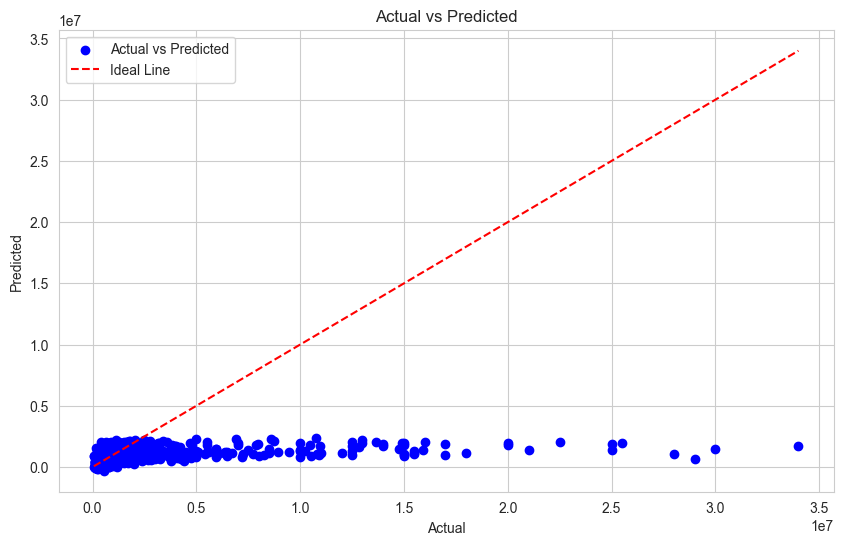

In [24]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Line')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [24]:
from sklearn.tree import  DecisionTreeRegressor
huber = HuberRegressor().fit(X_train, y_train)
y_pred = huber.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Median Absolute Error:", median_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


R-squared: -0.0735645654125241
Mean Absolute Error: 962660.1612426036
Median Absolute Error: 209050.0
Mean Squared Error: 11245084601232.406
Root Mean Squared Error: 3353369.1418083403


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_model.score(X_train, y_train)

0.9434419434153796

In [37]:
rf_model.score(X_test, y_test)

0.6782271780123337

In [39]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
cv = RepeatedKFold(n_splits=5, n_repeats=5,random_state=1)
pipe_tree = Pipeline([
    ('linear', RandomForestRegressor())
])

model_trees_scores = cross_val_score(pipe_tree, X, y, scoring='neg_mean_absolute_error', cv = cv)
model_trees_scores

array([-621699.19956763, -771936.7736626 , -661046.45017758,
       -652558.10448391, -738851.50660377, -633950.19484479,
       -608103.85006659, -755808.01305216, -723702.72288568,
       -671406.89398446, -728412.01019956, -703034.64835738,
       -573777.40621532, -612284.76642619, -682567.75491676,
       -669677.72539911, -670723.00990011, -731737.82075472,
       -600773.46964484, -637618.48052164, -666016.19580931,
       -677059.22231964, -704997.98331854, -712613.07977802,
       -565948.87356271])

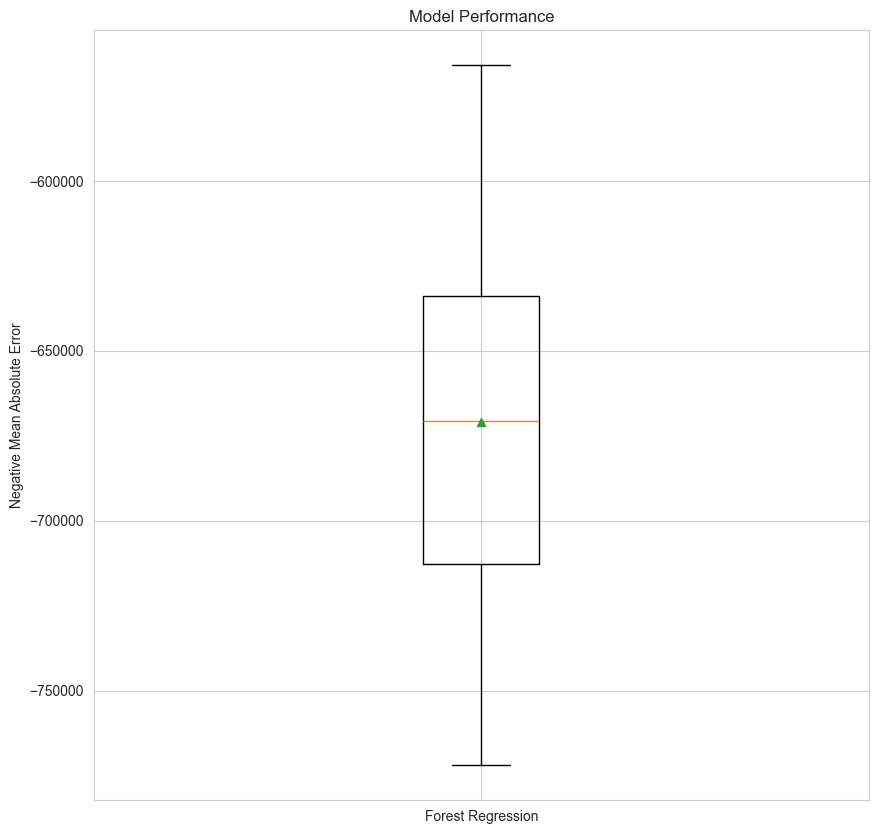

In [40]:
plt.figure(figsize=(10, 10))
plt.boxplot([model_trees_scores], labels=['Forest Regression'], showmeans=True)
plt.title('Model Performance')
plt.ylabel('Negative Mean Absolute Error')
plt.show()